### Application of Advanced Regression Techniques

#### Aim: Predict the sale price of a house

#### Features (80) :


MSSubClass,
MSZoning,
LotFrontage,
LotArea,
Street,
Alley,
LotShape,
LandContour,
Utilities,
LotConfig,
LandSlope,
Neighborhood,
Condition1,
Condition2,
BldgType,
HouseStyle,
OverallQual,
OverallCond,
YearBuilt,
YearRemodAdd,
RoofStyle,
RoofMatl,
Exterior1st,
Exterior2nd,
MasVnrType,
MasVnrArea,
ExterQual,
ExterCond,
Foundation,
BsmtQual,
BsmtCond,
BsmtExposure,
BsmtFinType1,
BsmtFinSF1,
BsmtFinType2,
BsmtFinSF2,
BsmtUnfSF,
TotalBsmtSF,
Heating,
HeatingQC,
CentralAir,
Electrical,
1stFlrSF,
2ndFlrSF,
LowQualFinSF,
GrLivArea,
BsmtFullBath,
BsmtHalfBath,
FullBath,
HalfBath,
Bedroom,
Kitchen,
KitchenQual,
TotRmsAbvGrd,
Functional,
Fireplaces,
FireplaceQu,
GarageType,
GarageYrBlt,
GarageFinish,
GarageCars,
GarageArea,
GarageQual,
GarageCond,
PavedDrive,
WoodDeckSF,
OpenPorchSF,
EnclosedPorch,
3SsnPorch,
ScreenPorch,
PoolArea,
PoolQC,
Fence,
MiscFeature,
MiscVal,
MoSold,
YrSold,
SaleType,
SaleCondition

#### Kaggle dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

***

In [2]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

***

**------------------------------------------------------------ 1. LOADING & LOOKING AT THE DATA --------------------------------------------------------------**

In [3]:
# load dataset 
df_train = pd.read_csv('train.csv', sep = ',')  
df_test = pd.read_csv("test.csv", sep = ',')  

# check shape
print('Train data Shape: ', df_train.shape)
print('Test data Shape: ', df_test.shape)

# look a first 10 rows of training data
df_train.head(10)

Train data Shape:  (1460, 81)
Test data Shape:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# look a first 10 rows of testing data
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
# see all the column names
print('Train Data Cols: ', df_train.columns)

Train Data Cols:  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Garage

In [6]:
df_train.info()
#df_train.isnull().sum(axis = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### Looking at the label to predict 

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- The average SalePrice of a house is 180,921
- The Maximum SalePrice of a house is 755,000 and Minimum 34,900

Text(133.44000000000005, 0.5, 'Features')

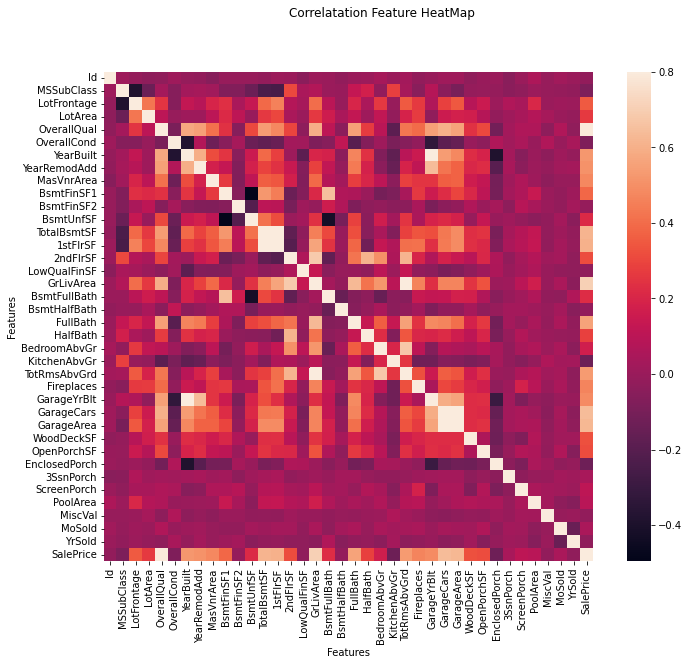

In [9]:
#correlation matrix
corr_mat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr_mat, vmax=.8,square=True)

plt.suptitle("Correlatation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")

Text(71.5, 0.5, 'Features')

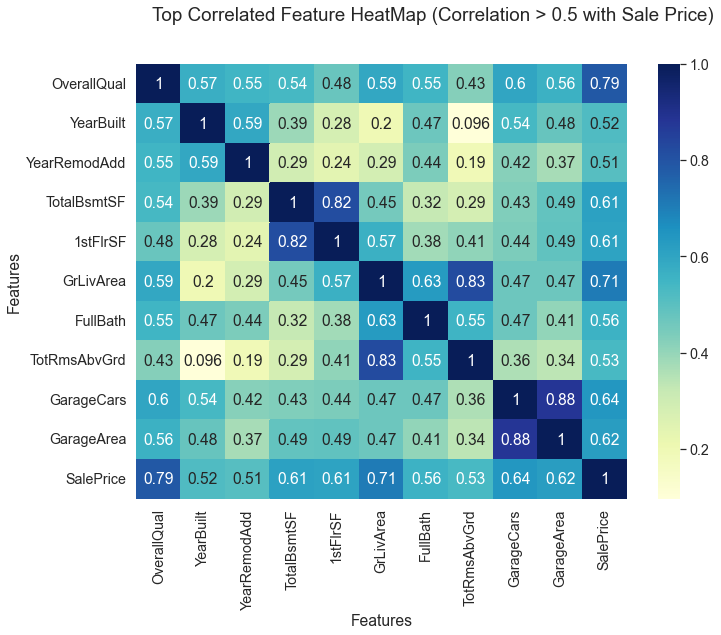

In [10]:
# most correlated features
corr_mat = df_train.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(df_train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

- OverallQual and GrLivArea seem to be the most correlated to SalePrice with values of 0.79 and 0.71 respectively.

In [11]:
print("Correlation Values in the top order: \n ")

corr = df_train.corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values in the top order: 
 
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.13590

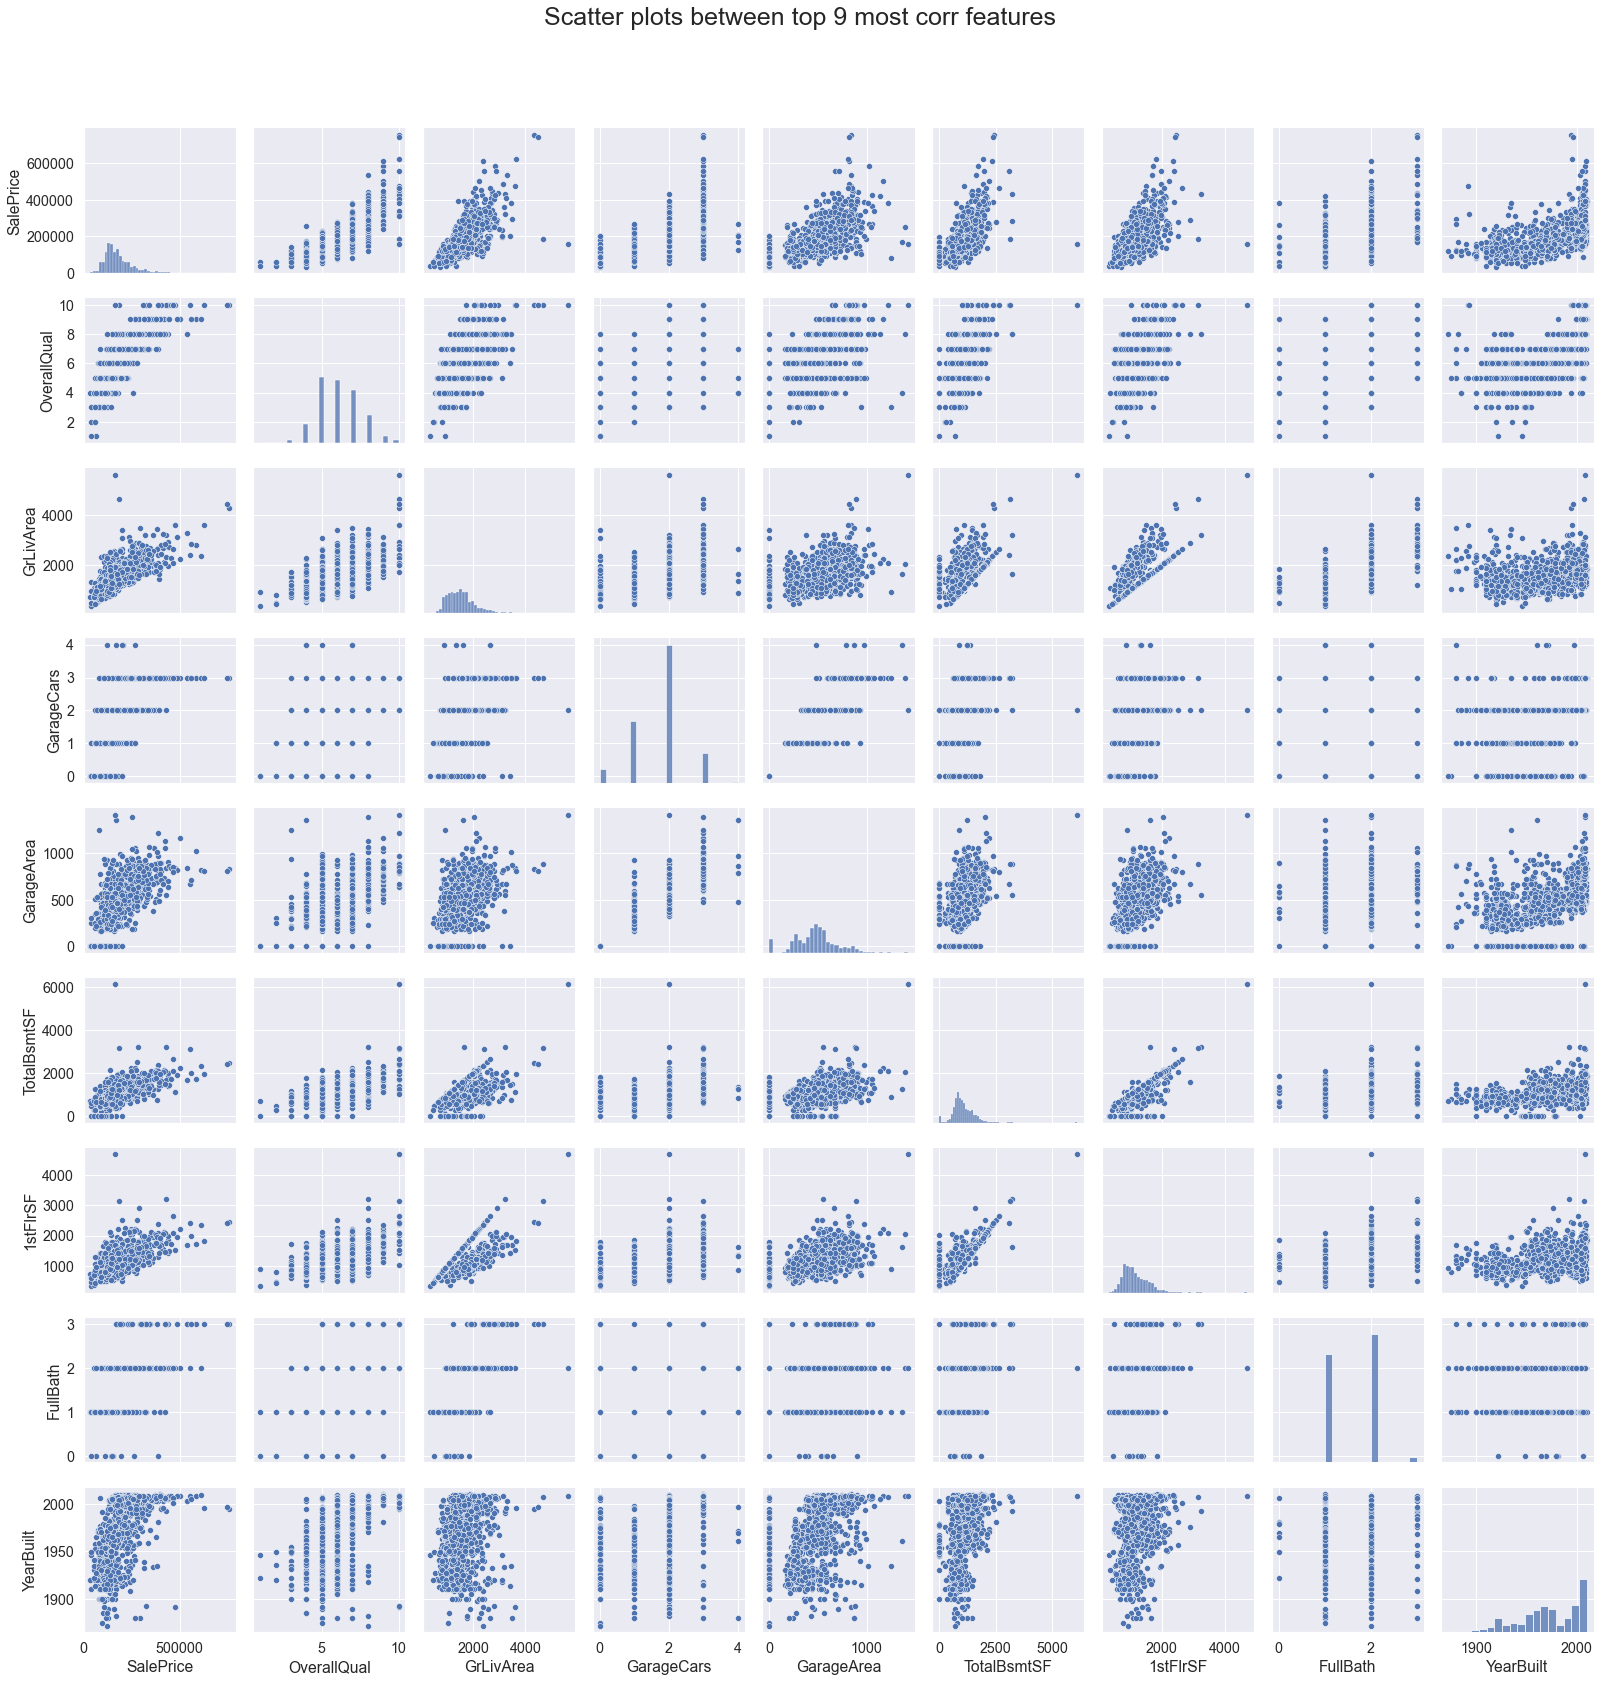

In [12]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

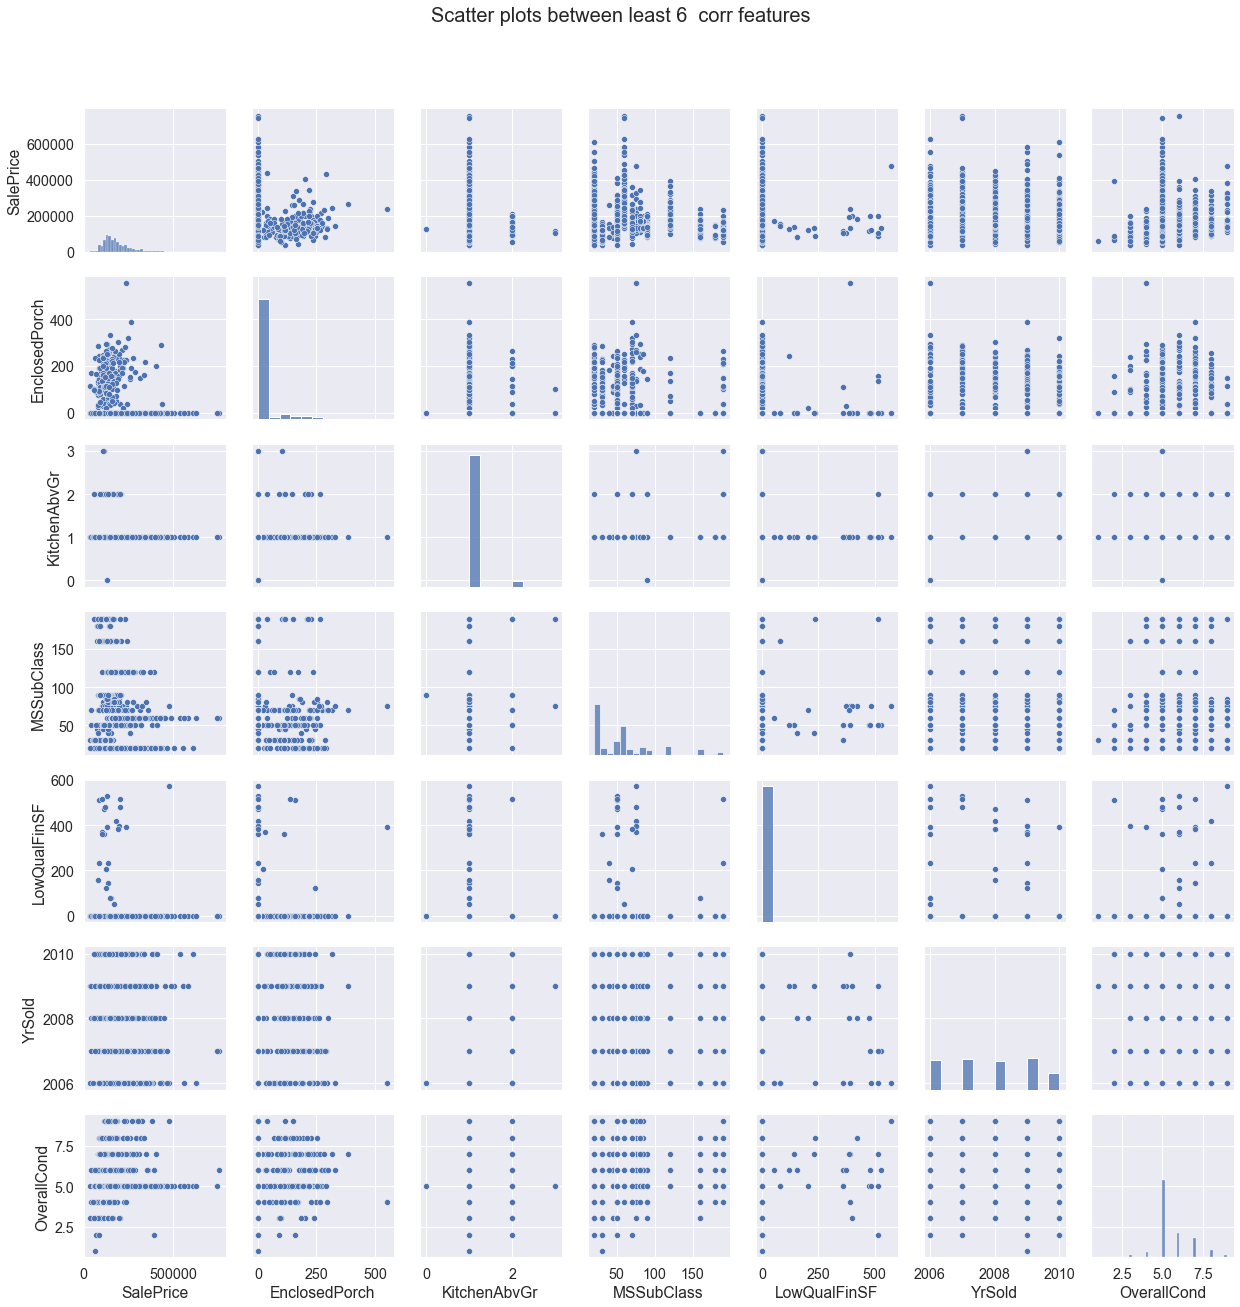

In [13]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice','EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']
sns_plot = sns.pairplot(df_train[cols])

plt.suptitle('Scatter plots between least 6  corr features', y=1.04, size=20)
plt.tight_layout()
plt.show()

#### -------------------------------------------------------------------- 2. HANDLING DATA --------------------------------------------------------------------

#### Drop Id Column

In [14]:
#drop id as it is not required for training or prediction
train_ID = df_train['Id']
test_ID = df_test['Id']

df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

df_train.shape, df_test.shape


((1460, 80), (1459, 79))

#### Checking for Outliers

<Figure size 864x864 with 0 Axes>

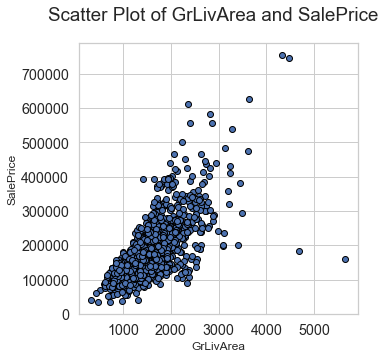

In [15]:

sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = df_train[a], y = df_train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()
    
scatter_plot('GrLivArea')


- It can be observed that there are large outliers which can negatively affect the prediction of sale price highly
- So the outliers need to be deleted

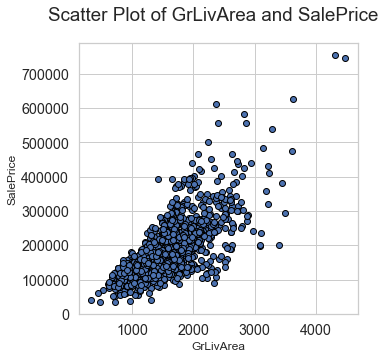

In [16]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['GrLivArea'] > 4000) & ( df_train['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

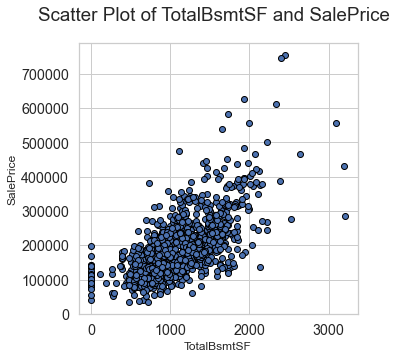

In [17]:
scatter_plot('TotalBsmtSF')

- There arent too large outliers, we do not need to delete any points

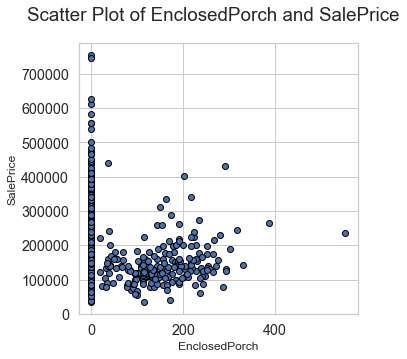

In [18]:
scatter_plot('EnclosedPorch')

- There is are some outliers that should be deleted so that it doesnt affect our predictions much

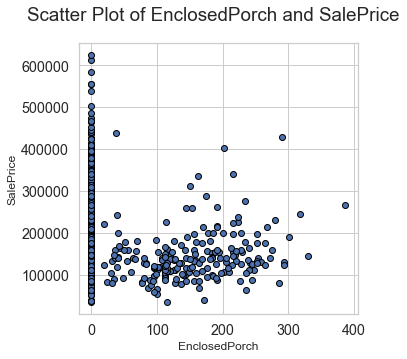

In [19]:
#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['EnclosedPorch']>400)].index)

#Deleting outliers
df_train =  df_train.drop( df_train[( df_train['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

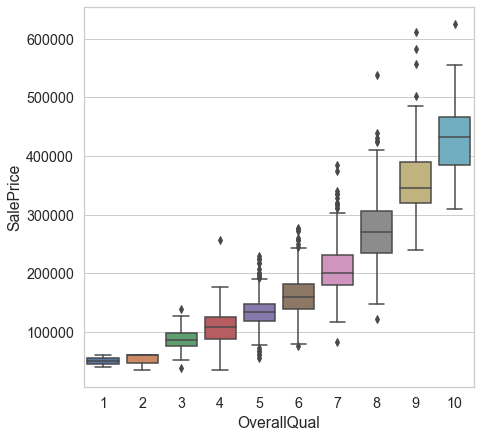

In [20]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = df_train['OverallQual'], y="SalePrice", data = data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

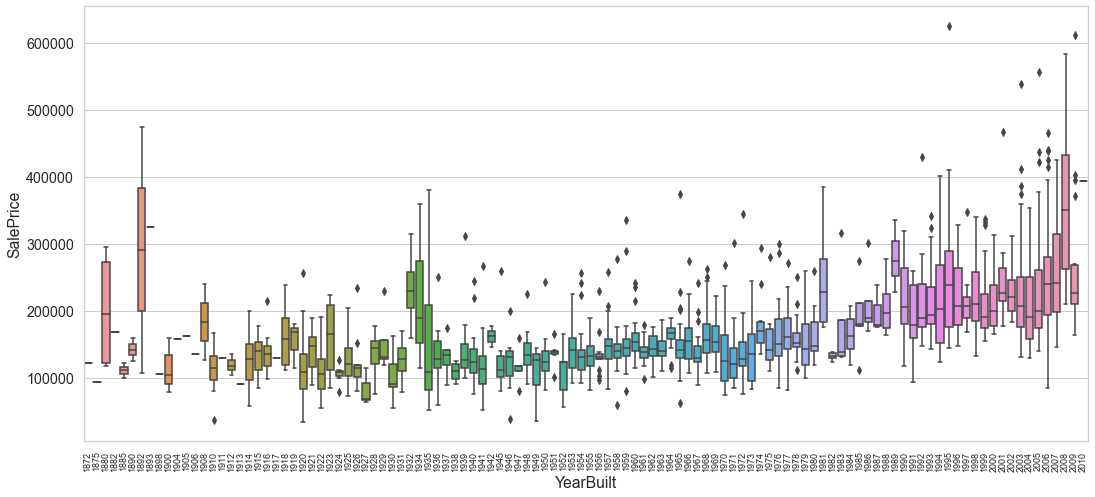

In [21]:
# plot a box plot for categorical feature : Year Built
fig = plt.figure(figsize=(18,8))

data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
sns.boxplot(x= df_train['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)

Skewness: 1.567473
Kurtosis: 3.888317


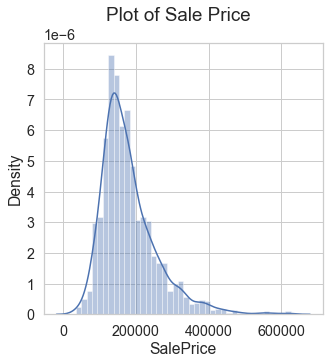

In [22]:
sns.distplot(df_train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

- It is observed that the data is right/+ve skewed, so applying log transformation to correct the positive skewness in the data.
- Applying logs means that errors in predicting expensive and cheap houses will affect the result equally.

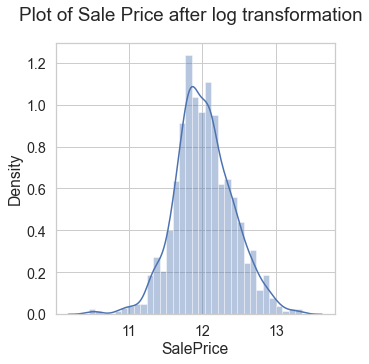

In [23]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(df_train['SalePrice'])
plt.show()

In [24]:
df_train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [25]:
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [26]:
df_train.shape

(1455, 80)

#### Handling missing data

In [27]:
#function to see the missing data in a dataframe
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)
    
    print(missing_data.head(n))
    
print('Missing data in the train set: \n ')   
missing_data(df_train,20)

Missing data in the train set: 
 
              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1451         99.725086                 2
MiscFeature                      1401         96.288660                 4
Alley                            1364         93.745704                 2
Fence                            1176         80.824742                 4
FireplaceQu                       690         47.422680                 5
LotFrontage                       259         17.800687               109
GarageType                         81          5.567010                 6
GarageCond                         81          5.567010                 5
GarageFinish                       81          5.567010                 3
GarageQual                         81          5.567010                 5
GarageYrBlt                        81          5.567010                97
BsmtFinType2                       38          2.611684                 6
Bsmt

In [28]:
df_train['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

- PoolQC,Alley have only two unique values
- PoolQC has 99.7% of missing data, which means most of the values are NA: No Pool ie most of the houses do not have a pool
- PoolQC,Alley,MiscFeature will be dropped due to large number of missing values

In [29]:
print('Missing data on test set: \n ')
missing_data(df_test,34)

Missing data on test set: 
 
              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
FireplaceQu                       730         50.034270                 5
LotFrontage                       227         15.558602               115
GarageCond                         78          5.346127                 5
GarageFinish                       78          5.346127                 3
GarageYrBlt                        78          5.346127                97
GarageQual                         78          5.346127                 4
GarageType                         76          5.209047                 6
BsmtCond                           45          3.084304                 4
BsmtExpos

In [30]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

- all records mostly "AllPub" for Utilities

- PoolQC,Alley,MiscFeature will be dropped due to large number of missing values
- Utilities has only 1 unique value
- Utility will also be dropped

In [31]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print('Total null values in train data: ', null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print('Total null values in test data: ', null_test)

Total null values in train data:  6950
Total null values in test data:  7000


In [32]:
# save the 'SalePrice'column as train_label
train_label = df_train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train 
df_train = df_train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [33]:
# function to HANDLE the missing data in a dataframe
def missing (df):
    
    # drop theses columns due to large null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None") 
    
    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o
    
    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [34]:
df_train = missing(df_train)
df_test = missing(df_test)

In [35]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print('Total null values in train data: ', null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print('Total null values in test data: ', null_test)

Total null values in train data:  0
Total null values in test data:  0


In [36]:
df_train.shape,df_test.shape

((1455, 75), (1459, 75))

In [37]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [38]:
# add the new columns
df_train = add_new_cols(df_train)
df_test = add_new_cols(df_test)

In [39]:
df_train.shape,df_test.shape

((1455, 80), (1459, 80))

#### Check data types

In [40]:
#training data
g1 = df_train.columns.to_series().groupby(df_train.dtypes).groups
{k.name: v for k, v in g1.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'Total_SF', 'Total_Porch_SF',
        'Total_Square_Feet', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'Total_Bathrooms'], dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQual', 'ExterCon

In [41]:
#testing data
g2 = df_test.columns.to_series().groupby(df_test.dtypes).groups
{k.name: v for k, v in g2.items()}

{'int64': Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'Total_Porch_SF', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'Total_SF', 'Total_Bathrooms',
        'Total_Square_Feet'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'ExterQ

In [42]:
#get dummy values for categorical data
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)

(1455, 292)
(1459, 278)


In [43]:
#align the training and testing data so that the columns in test data will be same as columns in train data
df_train, df_test = df_train.align(df_test, join = 'inner', axis=1)
print(df_train.shape)
print(df_test.shape)

(1455, 278)
(1459, 278)


In [44]:
# calculate total number of null values in training data
null_train = df_train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = df_test.isnull().sum().sum()
print(null_test)

0
0


In [45]:
df_train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
df_test.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(237)
memory usage: 814.2 KB


In [48]:
X_test = df_test           # testing features

In [49]:
df_train["SalePrice"] = train_label

In [50]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,0,1,0,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,0,1,0,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,0,1,0,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,1,0,0,0,0,0,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,0,1,0,12.429216


In [51]:
train_set, valid_set = train_test_split(df_train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # training features
y_train = train_set["SalePrice"].copy()             # training label

X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features
y_valid = valid_set["SalePrice"].copy()               # testing label

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1018, 278)
y_train shape: (1018,)

X_valid shape: (437, 278)
y_valid shape: (437,)

X_test shape: (1459, 278)


#### Check data type and null values

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1020
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(237)
memory usage: 569.6 KB


In [53]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1021 to 1459
Columns: 278 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(37), uint8(237)
memory usage: 244.5 KB


In [54]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1016    12.271345
1017    12.078239
1018    12.175613
1019    11.373663
1020    12.160029
Name: SalePrice, Length: 1018, dtype: float64

In [55]:
y_valid

1021    12.567237
1022    11.630709
1023    12.028739
1024    12.588191
1025    11.561716
          ...    
1455          NaN
1456          NaN
1457          NaN
1458          NaN
1459          NaN
Name: SalePrice, Length: 437, dtype: float64

In [56]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
0
0
5


- No null values in X_valid

- There are 5 null values in y_valid

In [57]:
np.where(np.isnan(y_valid))

(array([432, 433, 434, 435, 436], dtype=int64),)

In [58]:
# replace null values by mean value of y_valid column
mean = np.nanmean(y_valid)
y_valid = np.nan_to_num(y_valid,nan = mean)

In [59]:
#check again
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [60]:
y_valid.dtype

dtype('float64')

In [61]:
print("Valid data shape:")
print(X_valid.shape, y_valid.shape)
print()

Valid data shape:
(437, 278) (437,)



***

#### -------------------------------------------------------- 3. SET CROSS VALIDATION AND RMSE --------------------------------------------------

### Cross Validation


- done to avoid underfitting/overfitting of data and to get a better understanging of how good our models are performing
- split  data into k subsets, and train on k-1 of those subset,leaving one for testing
- performing 10-fold cross validation for each model#

In [62]:
# calculating cross validation score with scoring set to negative mean absolute error
def cross_validation(model):
    
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

### RMSE

In [63]:
# function to calculate Root mean square error (RMSE)
def rmse(y_pred, y_train): 
    
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)

### Plot Label

In [64]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):
    
    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    
    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

***

#### ---------------------------------------------------------------------- 4. DATA MODELLING  -------------------------------------------------------------------

### MODELS

#### 1. LINEAR REGRESSION MODEL

- Linear Regression is the first model used. In this model, the target value is expected to be a linear combination of the features. The coefficients are set to minimize the residual sum of squares between the target predicted and the observed features

Mean CV score:  0.47521990754063675
rmse:  0.3442710335666392
rmse:  0.42793480397158246


<Figure size 864x864 with 0 Axes>

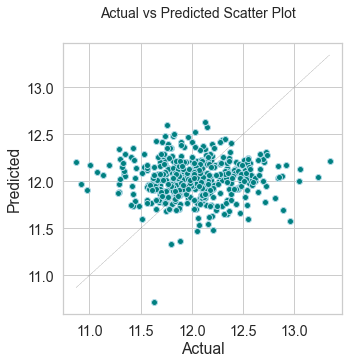

In [65]:
reg = linear_model.LinearRegression()

cross_validation(reg)

#fit on training
model_reg = reg.fit(X_train, y_train)

#predict value of sale price on the training set
y1_pred = reg.predict(X_train)

#caculate root mean square error on training set
rmse(y1_pred,y_train)

#predict value of sale price on the validation set
y1_pred_v = reg.predict(X_valid)

#caculate root mean square error on the validation set
rmse(y1_pred_v, y_valid)

#plot actual vs predicted
actual_vs_pred_plot(y_valid,y1_pred_v)

#### 2. RIDGE MODEL

- The second model used is Ridge Regression. Ridge Regression is a regularized version of linear regression. The parameter alpha is used to regularize the model. For alpha equal to zero, ridge regression is just a linear regression. RidgeCV model is used to implement ridge regression as it has a built-in cross validation of the alpha parameter. Sixteen different values of alpha between 7e-4 and 20 were used with a 10-fold cross validation. A pipeline using min-max scaler was built to apply to training, validation and testing data. 

Mean CV score:  0.41672707496259215
rmse:  0.36727237018186465
rmse:  0.39578861674332816


<Figure size 864x864 with 0 Axes>

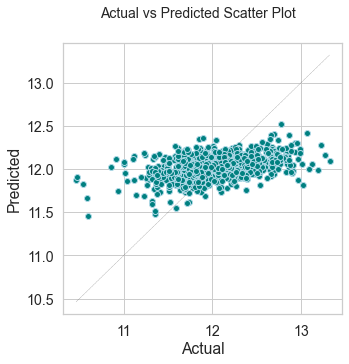

In [66]:
# to find the best value of alphas from this list, i will use RidgeCV
alphas_ = [ 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20]

# use robust scaler as unlike other scalers, the centering and scaling of ro bust scaler
#is based on percentiles and are therefore is not influenced by a few number of very large marginal outliers.

ridge = make_pipeline(MinMaxScaler(), linear_model.RidgeCV(alphas = alphas_, cv = 10))

cross_validation(ridge)

#fit
model_ridge = ridge.fit(X_train, y_train)

#predict value of sale price on the training set
y2_pred = ridge.predict(X_train)

#caculate root mean square error on training set
rmse(y2_pred,y_train)

#predict value of sale price on the valid set
y2_pred_v = ridge.predict(X_valid)

#caculate root mean square error on valid set
rmse(y2_pred_v, y_valid)

#plot
actual_vs_pred_plot(y_train,y2_pred)

#### 3. LASSO MODEL

- Lasso regression is also a regularized version of linear regression. Lasso regression automatically performs feature selection and can estimates sparse coefficients.  LassoCV model was used to implement lasso regression as it has a built-in cross validation of the alpha parameter. Different values of alpha were set with a 10-fold cross validation. Robust scaler was used in a pipeline to scale the training, validation and testing data. 

In [114]:
import warnings
warnings.filterwarnings("ignore")

# to find the best value of alphas from this list, i will use LassoCV
alpha2 = [0.0001, 0.0002, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

#use robust scaler so that predictions are not influenced by a few number of very large marginal outliers

lasso = make_pipeline(RobustScaler(), linear_model.LassoCV(alphas = alpha2, random_state=42,cv=12,max_iter=2000))

In [115]:
cross_validation(lasso)

Mean CV score:  0.42976432725153196


In [116]:
import warnings
warnings.filterwarnings("ignore")

#fit
model_lasso = lasso.fit(X_train, y_train)

#predict value of quality on the training set
y3_pred = lasso.predict(X_train)

#caculate root mean square error
rmse(y3_pred,y_train)

rmse:  0.3626799669181534


In [70]:
#predict value of sale price on the validation set
y3_pred_v = lasso.predict(X_valid)

#caculate root mean square error
rmse(y3_pred_v, y_valid)

rmse:  0.4059493256188701


<Figure size 864x864 with 0 Axes>

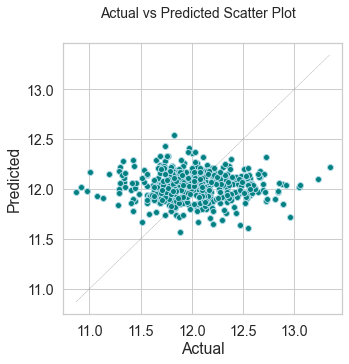

In [71]:
actual_vs_pred_plot(y_valid,y3_pred_v)

#### 4. K-NEAREST NEIGHBOUR REGRESSION MODEL


- K -nearest neighbour regressor is another popular model for regression tasks. It is a simple supervised machine learning model. The numbers of neighbours were set to three different values and the performance of this model was noted. Weights were set to uniform to assign equal weights to all points in each neighbourhood. The algorithm used was set to auto so that the best performing algorithm on the values was used. The leaf size was set to 25.

In [72]:
from sklearn.neighbors import KNeighborsRegressor

# N = 5 #
neigh = KNeighborsRegressor(n_neighbors = 5,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train,y_train)

#predict value of sale price on the training set
y4_pred = neigh.predict(X_train)

#caculate root mean square error
rmse(y4_pred,y_train)

rmse:  0.34885424380933583


In [73]:
# N = 7 #
neigh1 = KNeighborsRegressor(n_neighbors = 7,
                             weights = 'uniform',
                             leaf_size=25)
neigh1.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh1.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

rmse:  0.3665712393534244


In [74]:
# N = 9 #
neigh2 = KNeighborsRegressor(n_neighbors = 9,
                             weights = 'uniform',
                             leaf_size=25)
neigh2.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh2.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

rmse:  0.37262338937265044


In [75]:
# N=5 performs best

In [76]:
#predict value of sale price on the validation set
y4_pred_v = neigh.predict(X_valid)

#caculate root mean square error
rmse(y4_pred_v, y_valid)

rmse:  0.41351487769327555


Note: rmse increases when values of k(no. of neighbours) increase 

<Figure size 864x864 with 0 Axes>

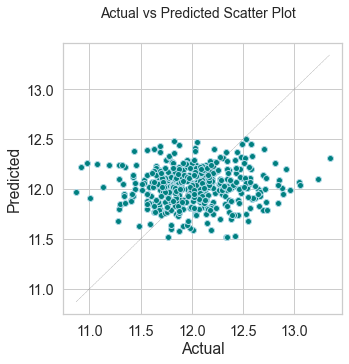

In [77]:
actual_vs_pred_plot(y_valid,y4_pred_v)

#### 5. DECISION TREE MODEL

- Decision tree model is also used to fit this data as it does not require much data cleaning and is not influenced by outliers. Decision trees can, unlike linear models, fit linearly inseparable datasets. The values of minimum leaves were set between 1 to 9 because a very small number of minimum leaves can cause overfitting whereas a large number of minimum leaves will prevent the tree from learning. Maximum depth of 7 and 9 were used to fit the data for predictions. 

In [78]:
from sklearn import tree

In [79]:
# set max depth to 5
tree_regr1 = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf=5,random_state=42)

# set max depth to 9
tree_regr2 = tree.DecisionTreeRegressor(max_depth = 9,min_samples_leaf=9,random_state=42)

#fit the traning data to a decision tree model
tree_regr11 = tree_regr1.fit(X_train,y_train)
tree_regr12 = tree_regr2.fit(X_train,y_train)

#predict value of sale price on the training set
y1 = tree_regr1.predict(X_train)
y2 = tree_regr2.predict(X_train)

In [80]:
cross_validation(tree_regr1)
cross_validation(tree_regr2)

Mean CV score:  0.4440722344760503
Mean CV score:  0.45825272349446555


In [81]:
#caculate root mean square error
rmse(y1,y_train)

rmse:  0.3238501847516405


In [82]:
rmse(y2,y_train)

rmse:  0.319434991726199


In [83]:
#predict value of sale price on the validation set
y5_pred_v = tree_regr2.predict(X_valid)

#caculate root mean square error
rmse(y5_pred_v, y_valid)

rmse:  0.4583579345988703


<Figure size 864x864 with 0 Axes>

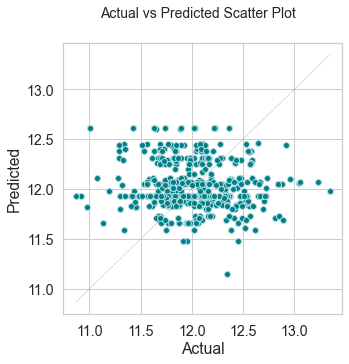

In [84]:
#plot
actual_vs_pred_plot(y_valid,y5_pred_v)

#### 6. Random Forest MODEL

- Random forest model is an ensemble method based on randomized decision trees. Grid search was used to select the best parameters with a 5-fold cross validation. The number of trees in the forest was set to 200 with a maximum depth of 5 and 3 minimum leaves. 

In [85]:
rforest = RandomForestRegressor(n_estimators=200,max_depth=13,random_state=42)

In [86]:
# grid search to find best value of C, gamma and epsilon
param_grid  = {'n_estimators': [100,150,200,250,300,350,400],
               'max_depth': [5,7,9,11,13,15,17], 
               'min_samples_leaf': [3,5,7,9,11,13,15]}

# set cross validation to 5
clf = GridSearchCV(rforest, param_grid, cv = 5, n_jobs = -2)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=13,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=200, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [87]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 200}

In [88]:
rforest = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=3, random_state=42)

In [89]:
cross_validation(rforest)

Mean CV score:  0.4033235895902428


In [90]:
#fit
model_rforest = rforest.fit(X_train, y_train)

#predict value of sale price on the training set
y6_pred = rforest.predict(X_train)

#caculate root mean square error
rmse(y6_pred,y_train)

rmse:  0.34988313302053653


In [91]:
#predict value of sale price on the validation set
y6_pred_v = rforest.predict(X_valid)

#caculate root mean square error
rmse(y6_pred_v, y_valid)

rmse:  0.386302468562908


In [92]:
#0: 0.38852359192540425
#1: 0.38616747296757176

<Figure size 864x864 with 0 Axes>

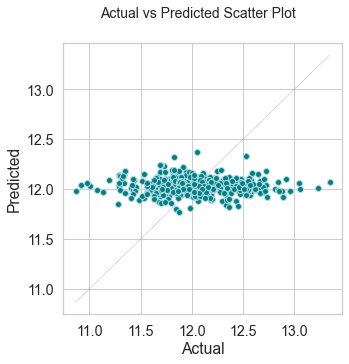

In [93]:
#plot
actual_vs_pred_plot(y_valid, y6_pred_v)

#### 7. Support Vector Regressor MODEL

- Support vector regressor is another powerful model. It is memory efficient and offers different kernels to choose from. Grid search was used to find the best value of the hyperparameters C, gamma and epsilon. The sigmoid kernel was used along with the default value of epsilon. 

In [94]:
svr_basic = SVR(C = 10, gamma = 0.001)

In [95]:
# grid search to find best value of C, gamma and epsilon and default kernel 'rbf'
param_grid  = {'C': [5,7,10,15,20,30],'gamma': [0.001, 0.0001, 0.0011, 0.00011], 'epsilon': [0.1, 0.01, 0.001, 0.005, 0.007, 0.008, 0.009] }

# set cross validation to 5
clf = GridSearchCV(svr_basic, param_grid, cv = 10, n_jobs = -2)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=10, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma=0.001, kernel='rbf', max_iter=-1,
                           shrinking=True, tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [5, 7, 10, 15, 20, 30],
                         'epsilon': [0.1, 0.01, 0.001, 0.005, 0.007, 0.008,
                                     0.009],
                         'gamma': [0.001, 0.0001, 0.0011, 0.00011]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
clf.best_params_

{'C': 5, 'epsilon': 0.1, 'gamma': 0.0011}

In [97]:
#make final SVR model with best parameters found from grid search
svr = make_pipeline(MinMaxScaler(), SVR(C= 5, epsilon= 0.1, gamma=0.0011, kernel = "sigmoid"))

In [98]:
cross_validation(svr)

Mean CV score:  0.40963206887105647


In [99]:
#fit
model_svr = svr.fit(X_train, y_train)

#predict value of sale price on the training set
y7_pred = svr.predict(X_train)

#caculate root mean square error
rmse(y7_pred,y_train)

rmse:  0.38245878515315423


In [100]:
#predict value of sale price on the validation set
y7_pred_v = svr.predict(X_valid)

#caculate root mean square error
rmse(y7_pred_v, y_valid)

rmse:  0.3900469727418305


In [101]:
# Linear - 0.4338387095039476
# Sigmoid - 0.3900469727418305
# With sigmoid as default kernel - 0.39670545624904924
# rbf - 0.39420253052849114

<Figure size 864x864 with 0 Axes>

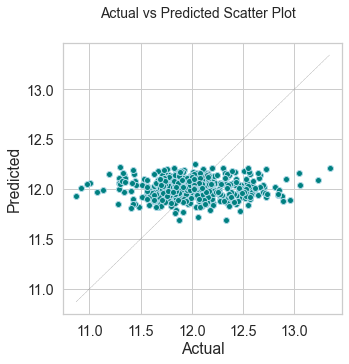

In [102]:
actual_vs_pred_plot(y_valid, y7_pred_v)

#### 8. Gradient Boosting Regressor MODEL

- Gradient boosting regression is an ensemble of weak prediction models. Two gradient boosting models with different depths were evaluated. The loss was set to ‘huber’ which is a combination of least square regression and a highly robust loss function. 

In [103]:
# set max depth to 4, min_samples_leaf to 15
gbr1 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 7,
                                min_samples_leaf=7, loss='huber', random_state =42) 

In [104]:
# set max depth to 7, min_samples_leaf to 10
gbr2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 9,
                                min_samples_leaf=10, loss='huber', random_state =42) 

In [105]:
cross_validation(gbr1)
cross_validation(gbr2)

Mean CV score:  0.4287974195276836
Mean CV score:  0.4292489907640939


In [106]:
#fit
model_gbr1 = gbr1.fit(X_train, y_train)
model_gbr2 = gbr2.fit(X_train, y_train)

#predict value of sale price on the training set
y_g1_pred = gbr1.predict(X_train)
y_g2_pred = gbr2.predict(X_train)

#caculate root mean square error
rmse(y_g1_pred,y_train)
rmse(y_g2_pred,y_train)

rmse:  0.15045439854847656
rmse:  0.13917493901563793


- model gbr2 performs best

In [107]:
#predict value of sale price on the validation set
y8_pred_v = gbr2.predict(X_valid)

#caculate root mean square error
rmse(y8_pred_v, y_valid)

rmse:  0.4118219430457788


<Figure size 864x864 with 0 Axes>

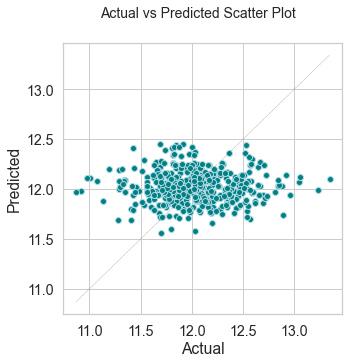

In [108]:
# plot for gbr2
actual_vs_pred_plot(y_valid, y8_pred_v)

#### 9. STACKED REGRESSOR MODEL

- The final model used is the stacked regressor model. Stacking allows the power of each individual estimator to be used by using their output as a final estimator input. Random forest, Support vector regressor, K -nearest neighbour regressor and ridge regressor were stacked with random forest as the final estimator.

In [109]:
# using Random Forest,Support Vector Regressor and Gradient Boosting to build a stack model because they have lower RMSE comparatively
estimators = [('Random Forest', rforest),
              ("Support Vector Regressor",svr),
              ("K",neigh),
              ("Ridge",ridge)
              ]

In [110]:
stacked = StackingRegressor(estimators = estimators, final_estimator = rforest, cv=5)

In [111]:
cross_validation(stacked)

Mean CV score:  0.4096861892199762


In [112]:
#fit
model_stack = stacked.fit(X_train, y_train)

#predict value of sale price on the training set
y9_pred = stacked.predict(X_train)

#caculate root mean square error
rmse(y9_pred,y_train)

rmse:  0.40597813360670537


In [113]:
#predict value of sale price on the validation set
y9_pred_v = stacked.predict(X_valid)

#caculate root mean square error
rmse(y9_pred_v, y_valid)

rmse:  0.37656322732768965


<Figure size 864x864 with 0 Axes>

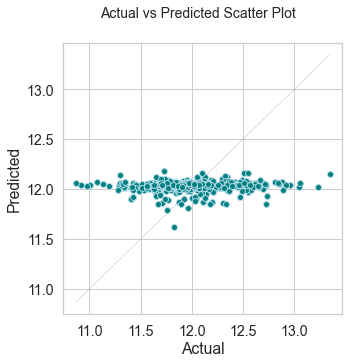

In [119]:
# plot
actual_vs_pred_plot(y_valid,y9_pred_v)

#### Wide and Deep Model Deep Learning

In [114]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate, LeakyReLU, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Normalize the input features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

# Normalize the target variable (y_train)
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()


# Wide input
wide_input = Input(shape=(X_train_scaled.shape[1],))

# Deep input (connected to the wide input)
#deep_input = Dense(128, activation='relu')(wide_input)
#deep_input = Dense(64, activation='relu')(deep_input)
# Adding L2 regularization and dropout to the deep part
deep_input = Dense(128, kernel_regularizer=l2(0.001))(wide_input)
#deep_input = BatchNormalization()(deep_input)
deep_input = LeakyReLU(alpha=0.1)(deep_input)
deep_input = Dropout(0.3)(deep_input)  # Dropout 30%
deep_input = Dense(64, kernel_regularizer=l2(0.001))(deep_input)
#deep_input = BatchNormalization()(deep_input)
deep_input = LeakyReLU(alpha=0.1)(deep_input)
deep_input = Dropout(0.3)(deep_input)

# Combine wide and deep models
combined = concatenate([wide_input, deep_input])

# Output layer
output = Dense(1)(combined)

# Define the model
wide_deep_model = Model(inputs=wide_input, outputs=output)

# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model with the optimizer
wide_deep_model.compile(optimizer=optimizer, loss='mse')

# Compile the model
#wide_deep_model.compile(optimizer='adam', loss='mse', learning_rate=0.001)

# Fit the model with your data
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
wide_deep_model.fit(X_train_scaled, y_train_scaled, epochs=1000, validation_split=0.25, batch_size=16, callbacks=[early_stopping])

#predict value of sale price on the training set
y10_pred_scaled = wide_deep_model.predict(X_train_scaled)

# Denormalize predictions to original scale
y10_pred_denorm = scaler_y.inverse_transform(y10_pred_scaled)

#caculate root mean square error
rmse(y10_pred_denorm,y_train)

Epoch 1/1000
48/48 [==============================] - 1s 5ms/step - loss: 0.4014 - val_loss: 0.2634
Epoch 2/1000
48/48 [==============================] - 0s 2ms/step - loss: 0.2522 - val_loss: 0.2153
Epoch 3/1000
48/48 [==============================] - 0s 2ms/step - loss: 0.2064 - val_loss: 0.1872
Epoch 4/1000
48/48 [==============================] - 0s 2ms/step - loss: 0.1751 - val_loss: 0.1632
Epoch 5/1000
48/48 [==============================] - 0s 2ms/step - loss: 0.1537 - val_loss: 0.1448
Epoch 6/1000
48/48 [==============================] - 0s 2ms/step - loss: 0.1354 - val_loss: 0.1339
Epoch 7/1000
48/48 [==============================] - 0s 2ms/step - loss: 0.1207 - val_loss: 0.1190
Epoch 8/1000
48/48 [==============================] - 0s 2ms/step - loss: 0.1097 - val_loss: 0.1102
Epoch 9/1000
48/48 [==============================] - 0s 2ms/step - loss: 0.0982 - val_loss: 0.1012
Epoch 10/1000
48/48 [==============================] - 0s 2ms/step - loss: 0.0898 - val_loss: 0.0933

In [115]:
# Predict on test data (normalized)
y10_pred_valid_scaled = wide_deep_model.predict(X_valid_scaled)

# Denormalize predictions to original scale
y10_pred_valid_denorm = scaler_y.inverse_transform(y10_pred_valid_scaled)

#caculate root mean square error on test data
rmse(y10_pred_valid_denorm,y_valid)

14/14 [==============================] - 0s 1ms/step
rmse:  0.4438056876074519


In [ ]:
# plot
actual_vs_pred_plot(y_valid,y10_pred_valid_denorm)

In [118]:
import os

print(os.listdir('kt_dir/hyperparameter_tuning'))

['oracle.json', 'trial_00', 'tuner0.json']


#### Hyper Param Tuning and deeper layers of the model

In [128]:
import kerastuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2

def build_model(hp):
    # Wide input
    wide_input = Input(shape=(X_train_scaled.shape[1],))
    '''
    # Deep input with hyperparameters
    deep_input = Dense(hp.Int('units1', min_value=64, max_value=256, step=32), kernel_regularizer=l2(hp.Float('l2', min_value=1e-5, max_value=1e-2, sampling='log')))(wide_input)
    deep_input = LeakyReLU(alpha=hp.Float('alpha', min_value=0.01, max_value=0.2, step=0.01))(deep_input)
    deep_input = Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1))(deep_input)
    deep_input = Dense(hp.Int('units2', min_value=32, max_value=128, step=16), kernel_regularizer=l2(hp.Float('l2', min_value=1e-5, max_value=1e-2, sampling='log')))(deep_input)
    deep_input = LeakyReLU(alpha=hp.Float('alpha', min_value=0.01, max_value=0.2, step=0.01))(deep_input)
    deep_input = Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1))(deep_input)
    '''

    
    deep_input = Dense(hp.Int('units1', min_value=64, max_value=512, step=64), kernel_regularizer=l2(hp.Float('l2', min_value=1e-6, max_value=1e-2, sampling='log')))(wide_input)
    deep_input = LeakyReLU(alpha=hp.Float('alpha', min_value=0.01, max_value=0.3, step=0.01))(deep_input)
    deep_input = Dropout(hp.Float('dropout', min_value=0.2, max_value=0.6, step=0.1))(deep_input)
    deep_input = Dense(hp.Int('units2', min_value=64, max_value=256, step=32), kernel_regularizer=l2(hp.Float('l2', min_value=1e-6, max_value=1e-2, sampling='log')))(deep_input)
    deep_input = LeakyReLU(alpha=hp.Float('alpha', min_value=0.01, max_value=0.3, step=0.01))(deep_input)
    deep_input = Dropout(hp.Float('dropout', min_value=0.2, max_value=0.6, step=0.1))(deep_input)
    deep_input = Dense(hp.Int('units2', min_value=32, max_value=128, step=16), kernel_regularizer=l2(hp.Float('l2', min_value=1e-5, max_value=1e-2, sampling='log')))(deep_input)
    deep_input = LeakyReLU(alpha=hp.Float('alpha', min_value=0.01, max_value=0.2, step=0.01))(deep_input)
    deep_input = Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1))(deep_input)
    

    # Combine wide and deep models
    combined = concatenate([wide_input, deep_input])

    # Output layer
    output = Dense(1)(combined)

    # Define the model
    wide_deep_model = Model(inputs=wide_input, outputs=output)

    # Define the optimizer with a custom learning rate
    optimizer = Adam(learning_rate=0.001)

    # Compile the model with the optimizer
    wide_deep_model.compile(optimizer=optimizer, loss='mse')

    return wide_deep_model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='C:/house_price/kt_dir',
    project_name='hyperparameter_tuning',
    overwrite=True
)

# Run the search
tuner.search(X_train_scaled, y_train_scaled, epochs=100, validation_split=0.25, batch_size=16)

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)

Trial 10 Complete [00h 00m 17s]
val_loss: 0.028192896395921707

Best val_loss So Far: 0.022501228377223015
Total elapsed time: 00h 02m 33s
{'units1': 64, 'l2': 0.007527457083097, 'alpha': 0.04, 'dropout': 0.4, 'units2': 256}


In [129]:
#predict value of sale price on the training set
y10_pred_scaled = best_model.predict(X_train_scaled)

# Denormalize predictions to original scale
y10_pred_denorm = scaler_y.inverse_transform(y10_pred_scaled)

#caculate root mean square error
print('Train Error: ', rmse(y10_pred_denorm,y_train))

# Predict on test data (normalized)
y10_pred_valid_scaled = best_model.predict(X_valid_scaled)

# Denormalize predictions to original scale
y10_pred_valid_denorm = scaler_y.inverse_transform(y10_pred_valid_scaled)

#caculate root mean square error on test data
print('Test Error: ', rmse(y10_pred_valid_denorm,y_valid))

32/32 [==============================] - 0s 2ms/step
rmse:  0.38113159550741726
Train Error:  None
14/14 [==============================] - 0s 1ms/step
rmse:  0.43931632280383703
Test Error:  None


### Observations

#### RMSE:

- linear reg                        : 0.42793480397157035
- ridge                             : 0.3957886167433282
- lasso                             : 0.4059493256188701
- k-nearest neighbour(k=5)          : 0.41351487769327555
- decision tree(maxdepth=9)         : 0.4583579345988703
- random forest                     : 0.38616747296757176
- Support Vector Regressor          : 0.3900469727418305
- Gradient Boosting Regressor       : 0.4118219430457788
- Stacked Regressor model           : 0.3769718491202983
- Wide and Deep Model Deep Learning : 0.4438056876074519
- Hyper Param Tuning Deep Learning  : 0.43931632280383703

#### How errors compare:

- The lowest error is of  : Stacked Regressor model  
- The largest error is of : decision tree(maxdepth=9)
- Therefore Stacked Regressor model will be applied to the test data as it is the best performing model

***